In [47]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import torch

import matplotlib.pyplot as plt

from model import Model, train, cal_phi

In [156]:
N = 13
lam = torch.linspace(0, 1, 2 ** N)
lam /= lam.norm()


In [157]:
model = Model(N)

loss_list = train(model, lam, epoch=50)
print(loss_list[-1])


0.015662361


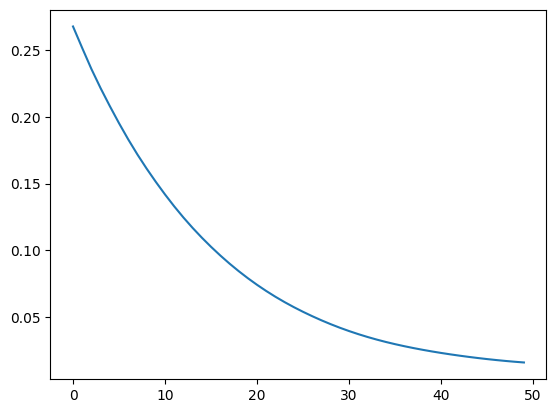

In [158]:
plt.plot(loss_list)
plt.show()

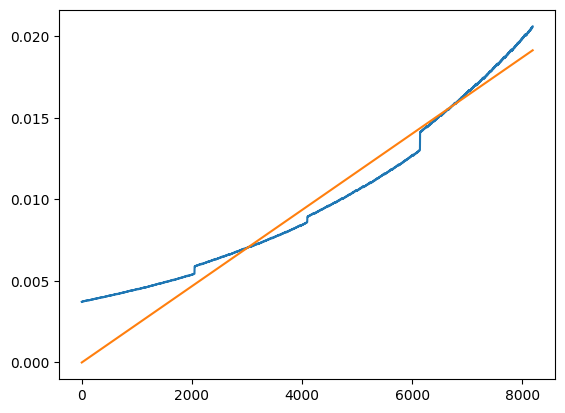

In [159]:
phi = cal_phi(model.theta).detach().numpy()

plt.plot(torch.arange(2 ** N), phi)
plt.plot(torch.arange(2 ** N), lam)

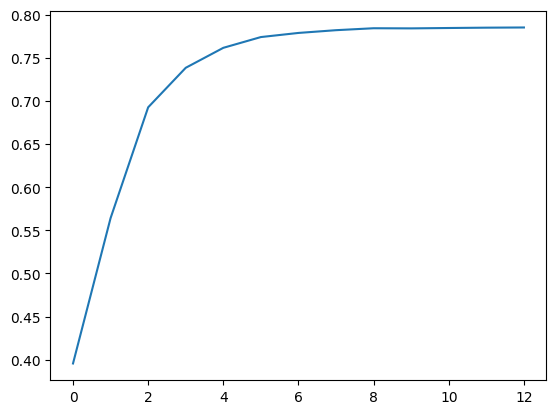

In [160]:
plt.plot(model.theta.detach().numpy())